# <h3 align="center">__Module 2 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 2__</h3>
# <h3 align="center">__Due at the end of Module 2__</h3><br>



# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic. 

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# __1. Module 2__<br>

A covariance matrix is a square matrix that captures the pairwise covariance between multiple features in a dataset. Each element $C[i,j]$ represents the covariance between the $i$-th and $j$-th features. Diagonal elements represent variances of individual features.

Why is it Important?

* Multivariate Relationships: It helps understand how features move together (positive/negative correlation).
* Dimensionality Reduction: It's the foundation of techniques like Principal Component Analysis (PCA).
* Data Representation: Useful for understanding the structure of multivariate data in fields like finance, image processing, and machine learning.

## Covariance Equation

The covariance between two variables $X_i$ and $X_j$ over $n$ observations is given by:

$$C_{i,j} = \frac{1}{n-1} \sum_{k=1}^{n} (X_{ki} - \mu_i)(X_{kj} - \mu_j)$$

where,
*  $X_{ki}$  and $ X_{kj}$ are values of variables $X_i$ and $X_j$ for the $k$-th observation.
*   $\mu_i$  and  $\mu_j$ are the means of $X_i$ and $X_j$, respectively.
*   $n$ is the total number of observations.


## Covariance Matrix Representation

For a dataset with $d$ features, the covariance matrix $C$ is represented as:

\begin{bmatrix}
C_{1,1} & C_{1,2} & C_{1,3} & \dots  & C_{1,d} \\
C_{2,1} & C_{2,2} & C_{2,3} & \dots  & C_{2,d} \\
C_{3,1} & C_{3,2} & C_{3,3} & \dots  & C_{3,d} \\
\vdots  & \vdots  & \vdots  & \ddots & \vdots  \\
C_{d,1} & C_{d,2} & C_{d,3} & \dots  & C_{d,d} \\
\end{bmatrix}


This represents a $ d \times $ symmetric matrix, where each element $C_{i,j}$ is the covariance between the variables $X_i$ and $X_j$.



### Without using any Python packages like `numpy` or `pandas`, write a function to calculate the covariance matrix for a given dataset. 

In [29]:
def compute_mean(X):
    """
    Compute the mean for a given dataset.
    Input: X - A 1D list to represent the observation X
    Output: number represent the mean
    """
    size = len(X)
    sum = 0
    for num in X:
        sum+= num
    return sum/size

def compute_covariance(X, Y):
    """
    Compute the covariance matrix for a given dataset.
    Input: X and Y are two feature columns
    Output: Covariance as number
    """
    mean_X = compute_mean(X) # Calculate mean for X
    mean_Y = compute_mean(Y) # Calcualte mean for Y

    n = len(X) # number of observation
    result = 0
    for k in range(n):
        result+= (X[k] - mean_X)*(Y[k] - mean_Y)
    covariance = result/(n-1)
    return covariance

def get_column_data(data, j):
    rows = len(data)
    column_data = []
    for i in range(rows):
        column_data.append(float(data[i][j]))
    return column_data
        
def compute_covariance_matrix(data):
    """
    Compute the covariance matrix for a given dataset.
    Input: data - A 2D list where each inner list is a variable (e.g., [[X], [Y]])
    Output: Covariance matrix as a 2D list
    """

    # your code here
    rows = len(data)
    cols = len(data[0])

    # Calculate covariant matrix
    covariant_matrix =[ [0 for _ in range(cols)] for _ in range(cols)]
    for i in range(cols):
        for j in range(cols):
            # Covariant of Xi and Xj feature columns 
            Xi = get_column_data(data, i)
            Xj = get_column_data(data, j)
            covariant_matrix[i][j] = round(compute_covariance(Xi, Xj) , 4) # round it for better human readability
            
    return covariant_matrix

### Use your new covariance matrix function to compute the covariance matrix of the first 5 rows of the iris dataset. 

In [30]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# iris is a Bunch object, similar to a dictionary, containing data and metadata
# The features (measurements) of the Iris dataset are stored in 'data'
iris_data = iris.data

# The labels (species of each instance) are stored in 'target'
iris_labels = iris.target

# The names of the features and labels are also stored
feature_names = iris.feature_names
label_names = iris.target_names

# To see the shape of the dataset
print("Data shape:", iris_data.shape)  # e.g., (150, 4)
print("Labels shape:", iris_labels.shape)  # e.g., (150,)

# If you want to see the first few entries
print("First 5 rows of data:\n", iris_data[:5])
print("First 5 labels:", iris_labels[:5])

covariant_matrix = compute_covariance_matrix(iris_data[:5])

print("Covariance matrix of features based on first five rows")      
for row in covariant_matrix:
    print(row)


Data shape: (150, 4)
Labels shape: (150,)
First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]
Covariance matrix of features based on first five rows
[0.043, 0.0365, -0.0025, 0.0]
[0.0365, 0.067, -0.0025, 0.0]
[-0.0025, -0.0025, 0.005, 0.0]
[0.0, 0.0, 0.0, 0.0]


# Discuss the relationship between the variables.

## Features
We have following features
Feature 0: Sepal Length
Feature 1: Sepal Width
Feature 2: Petal Length
Feature 3: Petal Width

## Diagonal Elements (Variances)
The diagonal elements show the variance of each individual feature. A higher variance means the data points for that feature are more spread out.
- `[0][0] = 0.043` (Variance of Sepal Length): Sepal length has a relatively small variance. This means that among these 5 Setosa flowers, their sepal lengths are quite close to each other.
- `[1][1] = 0.067` (Variance of Sepal Width): Sepal width has the highest variance among these 5 flowers. This suggests there's a bit more spread in sepal widths compared to sepal lengths or petal dimensions.
- `[2][2] = 0.005` (Variance of Petal Length): Petal length has an extremely small variance. This indicates that the petal lengths for these 5 Setosa flowers are very, very similar.
- `[3][3] = 0.0` (Variance of Petal Width): The variance of petal width is exactly 0.0. This is the most striking observation! It means that for these 5 Setosa flowers, the petal width is identical for all of them. This implies that the petal width doesn't vary at all within this tiny subset.

## Off-Diagonal Elements (Covariances)
The off-diagonal elements show the covariance between pairs of features.

- Positive Covariance: Features tend to increase together.
- Negative Covariance: One feature tends to increase as the other decreases.
- Zero/Near Zero Covariance: Little to no linear relationship.

Let's look at some key pairs:

- `[0][1] = 0.0365` (Covariance between Sepal Length and Sepal Width): This is a positive value. It suggests that among these 5 Setosa flowers, as the sepal length tends to increase, the sepal width also tends to increase (and vice-versa).
- `[0][2] = -0.0025` (Covariance between Sepal Length and Petal Length): This is a small negative value. It suggests a very slight tendency for sepal length to decrease as petal length increases, or vice-versa. However, due to its small magnitude and the tiny sample size, this is likely insignificant.
- `[1][2] = -0.0025` (Covariance between Sepal Width and Petal Length): Similar to the above, a very small negative value. Suggests a very slight inverse relationship.

## Any Covariance with Petal Width ([3:], [0][3], [1][3], [2][3]):
- Notice that all covariance values involving Petal Width (Feature 3) are 0.0.
- This is directly a consequence of its variance being 0.0.
- If a variable never changes, it cannot co-vary with any other variable.
- Its deviation from its mean is always zero, making the numerator of the covariance formula zero.


### Plot data points for 2 of the features in the dataset and show how the covariance matrix reflects the orientation and spread of data.
**Visualizing the two features:**
To visualize the relationship between two features, a scatterplot is usually the most informative and common method. 

**Visualizing the 2x2 Covariance Matrix:**
While heatmaps are more useful for visualizing relationships between many variables, we can create a simple heatmap for the 2x2 matrix. The color intensity can represent the magnitude of the covariance, and the color itself can indicate the direction (positive/negative).

**Note:** We will all the rows and will recalculate the covariation matrix based on two features only.

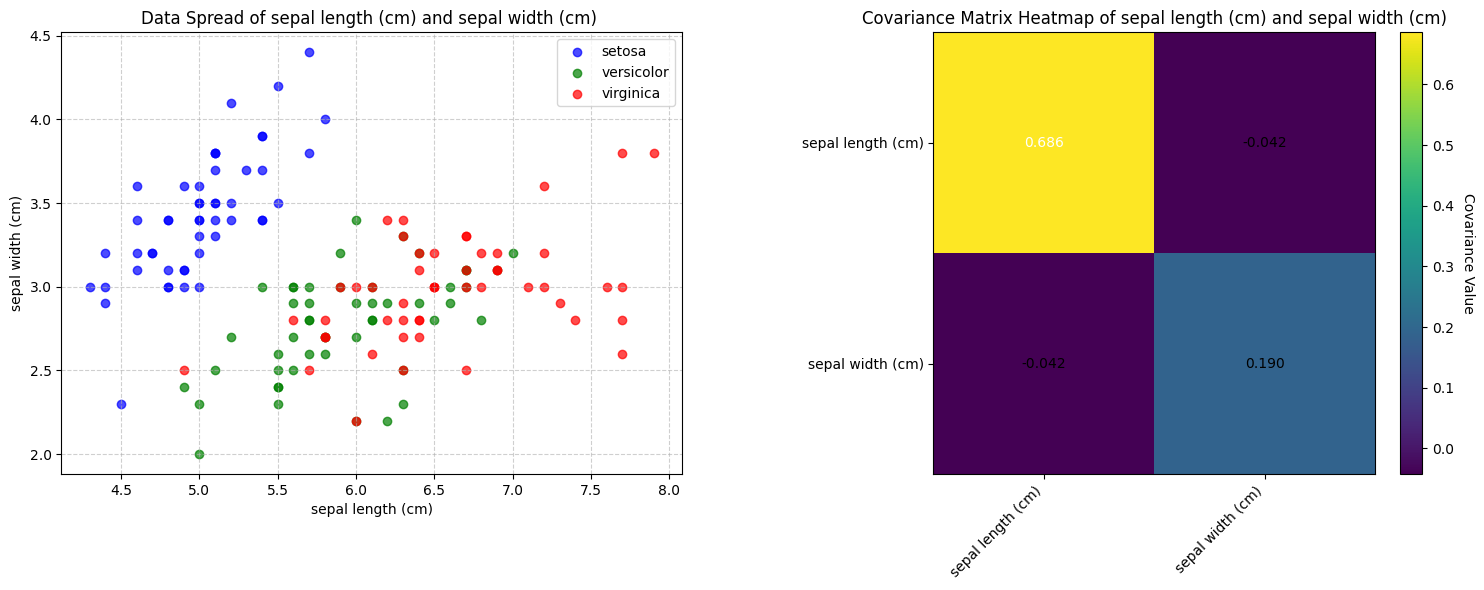

In [46]:
# Create plots here
import matplotlib.pyplot as plt

# Covariance matrix for two features
two_features_data = iris_data[:,0:2]
cov_matrix_two_features = compute_covariance_matrix(two_features_data)

fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Create a figure with 1 row, 2 columns of subplots

# Plot 1: Scatter plot of the two features data points
feature_x = 'sepal length (cm)'
feature_y = 'sepal width (cm)'

colors = ['blue', 'green', 'red'] # For setosa, versicolor, virginica
for label_id, label_name in enumerate(label_names):
    two_features_filtered = [row for row, label in zip(two_features_data, iris_labels) if label == label_id]
    X = [obs[0] for obs in two_features_filtered] # Get all sepal lengths
    Y = [obs[1] for obs in two_features_filtered] # Get all sepal widths
    axes[0].scatter(X, Y, label=label_name, alpha=0.7, color=colors[label_id])
    axes[0].set_xlabel(feature_x)
    axes[0].set_ylabel(feature_y)    
axes[0].set_title(f'Data Spread of {feature_x} and {feature_y} ')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Plot 2: Plot the 2*2 Covariance Matrix as a Heatmap
# Display the image (heatmap)
im = axes[1].imshow(cov_matrix_two_features, cmap='viridis', origin='upper') # 'origin' for correct y-axis direction

# Add colorbar
cbar = fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
cbar.set_label('Covariance Value', rotation=270, labelpad=15)

heatmap_labels = [feature_x, feature_y]
axes[1].set_title(f'Covariance Matrix Heatmap of {feature_x} and {feature_y}')
axes[1].set_xticks(range(len(heatmap_labels))) # Set tick locations for 0 and 1
axes[1].set_yticks(range(len(heatmap_labels)))
axes[1].set_xticklabels(heatmap_labels, rotation=45, ha='right')
axes[1].set_yticklabels(heatmap_labels, rotation=0)

# Get max covariance value
max_cov = max(max(row) for row in cov_matrix_two_features)

# Loop over data dimensions and create text annotations.
for i in range(2):
    for j in range(2):
        text_color = "white" if cov_matrix_two_features[i][j] > max_cov / 2 else "black" # Simple text color logic
        axes[1].text(j, i, f"{cov_matrix_two_features[i][j]:.3f}",
                     ha="center", va="center", color=text_color, fontsize=10)

plt.tight_layout()
plt.show()



## Scatter Plot (Left Side)
We can see the original data for two features for following labels
- **setosa**: This cluster is well-separated from the other two. It tends to have smaller sepal lengths and (relatively) larger sepal widths compared to the other species. The individual cluster for Setosa appear slightly positively correlated (slight upward-right slant).
- **versicolor** and **virginica**: These two clusters are closer to each other and overlapped significantly. They have larger sepal lengths and varying sepal widths. Their individual clusters tend to be more elongated.


## Covariance Matrix Heatmap (Right Side)
### Cells on the Diagonal: These represent the variances of the individual features.
- `sepal length (cm)` vs `sepal length (cm)` (top-left, ~0.686): This large positive value indicates that 'sepal length' has a relatively high variance across the entire dataset. Visually, this means the data points in the scatter plot (all species combined) span a wide range horizontally.
- `sepal width (cm) vs sepal width (cm)` (bottom-right, ~0.190): This value is positive but smaller than sepal length's variance. It indicates that 'sepal width' also has considerable variance, but the overall spread along the Y-axis is less than the spread along the X-axis for the combined dataset.

### Cells on the Off-Diagonal: These represent the covariance between the two features.
`sepal length (cm)` vs `sepal width (cm)` (top-right and bottom-left, ~-0.420)
- The value is negative, but relatively small in magnitude compared to the variances.
- A negative covariance suggests that as sepal length increases, sepal width tends to decrease (or vice-versa). However, because the magnitude is small, this indicates a very weak linear relationship between these two features across the entire dataset.


# References
[1] Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein. Introduction to
Algorithms, Third Edition. MIT Press and McGraw-Hill, 2009. ISBN-13: 978-0-262-03384-8<br><br>